In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data=load_iris()
print(data.data.shape)
print("Classes to predict:", data.target_names)
print("Features:", data.feature_names)
x=data.data
y=data.target
display(x.shape,y.shape)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=50,test_size=0.25)

classifier=DecisionTreeClassifier()
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy on train data using Gini:",accuracy_score(y_true=ytrain,y_pred=classifier.predict(xtrain)))
print("Accuracy on test data using Gini:",accuracy_score(y_true=ytest,y_pred=ypred))

classifier_entropy=DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(xtrain,ytrain)
ypred_entropy=classifier_entropy.predict(xtest)
print("Accuracy on train data using entropy:",accuracy_score(y_true=ytrain,y_pred=classifier_entropy.predict(xtrain)))
print("Accuracy on test data using entropy:",accuracy_score(y_true=ytest,y_pred=ypred_entropy))


classifier_entropy1=DecisionTreeClassifier(criterion='entropy',min_samples_split=50)
classifier_entropy1.fit(xtrain,ytrain)
ypred_entropy1=classifier_entropy1.predict(xtest)
print("Accuracy on train data:",accuracy_score(y_true=ytrain,y_pred=classifier_entropy1.predict(xtrain)))
print("Accuracy on test data using entropy:",accuracy_score(y_true=ytest,y_pred=ypred_entropy1))




(150, 4)
Classes to predict: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

(150,)

Accuracy on train data using Gini: 1.0
Accuracy on test data using Gini: 0.9473684210526315
Accuracy on train data using entropy: 1.0
Accuracy on test data using entropy: 0.9473684210526315
Accuracy on train data: 0.9642857142857143
Accuracy on test data using entropy: 0.9473684210526315


In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dotdata=StringIO()


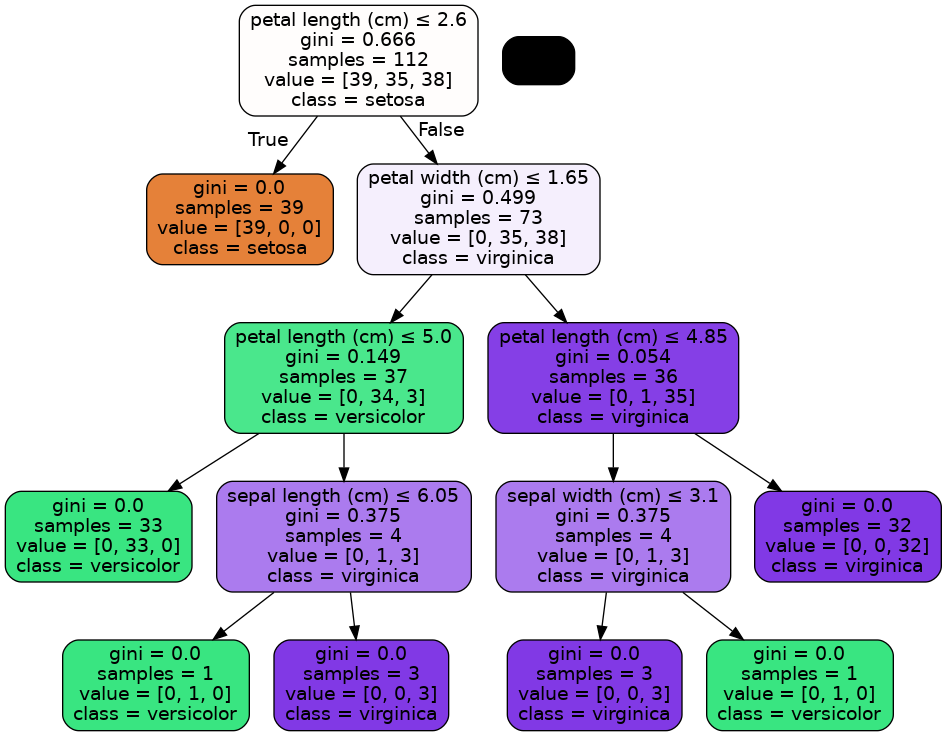

In [15]:
export_graphviz(classifier,out_file=dotdata,filled=True,rounded=True,special_characters=True,feature_names=data.feature_names,class_names=data.target_names)
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
Image(graph.create_png())

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt


In [18]:
data=load_iris()
X,y=data.data,data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
print("Train accuracy:",clf.score(X_train,y_train))
print("Test accuracy:",clf.score(X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.9473684210526315


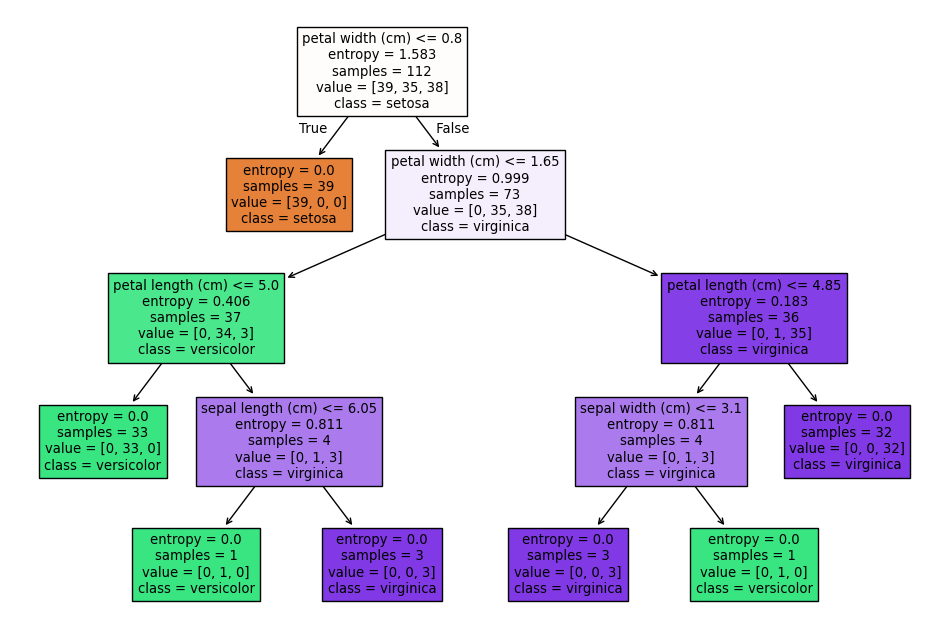

In [24]:
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=data.feature_names,class_names=data.target_names)
plt.show()